In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(x, y, classifier, resolution=0.02):
    # Set up marker generator and colormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), x2_max.max())
    
    # Plot class examples
    for idx, c in enumerate(np.unique(y)):
        plt.scatter(x=x[y == c, 0], y=x[y == c, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=c, edgecolor="black")

    plt.legend(loc="upper left")


In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target

In [5]:
np.unique(y)

array([0, 1, 2])

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
x_train_01_subset = x_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [8]:
from LogisticRegression import LogisticRegressionGD

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(x_train_01_subset, y_train_01_subset)

C:\Users\steph\AppData\Local\Temp\ipykernel_8408\1579022603.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == c, 0], y=x[y == c, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=c, edgecolor="black")


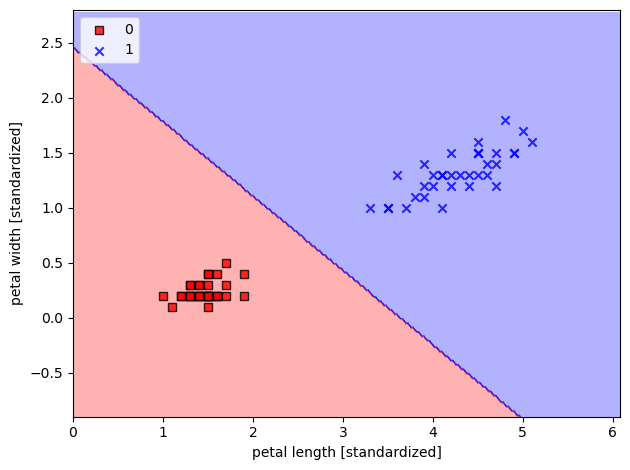

In [9]:
plot_decision_regions(x=x_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [10]:
from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt 
import numpy as np 

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02): 
    # setup marker generator and color map 
    markers = ('s', 'x', 'o', '^', 'v') 
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') 
    cmap = ListedColormap(colors[:len(np.unique(y))]) 
    
    # plot the decision surface 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)) 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape) 
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max()) 
    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black') 
    # highlight test examples 
    if test_idx: 
        # plot all examples 
        X_test, y_test = X[test_idx, :], y[test_idx] 
        plt.scatter(X_test[:, 0], X_test[:, 1], c='green', edgecolor='black', alpha=0.3, linewidth=1, marker='o', s=100, label='test set') 


C:\Users\steph\AppData\Local\Temp\ipykernel_8408\3513498361.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


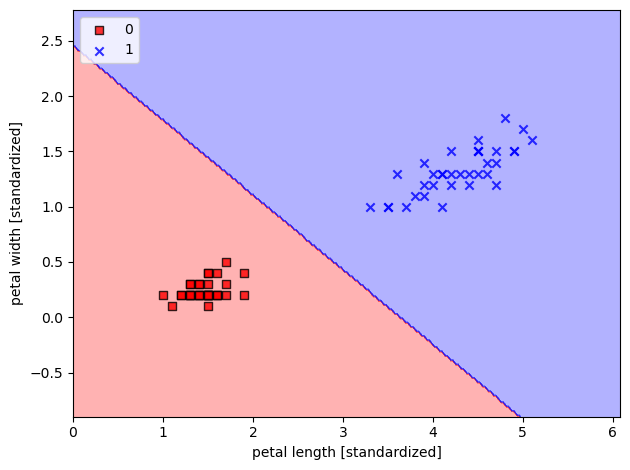

In [11]:
plot_decision_regions(X=x_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [13]:
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(x_train_std, y_train)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

C:\Users\steph\AppData\Local\Temp\ipykernel_8408\3513498361.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


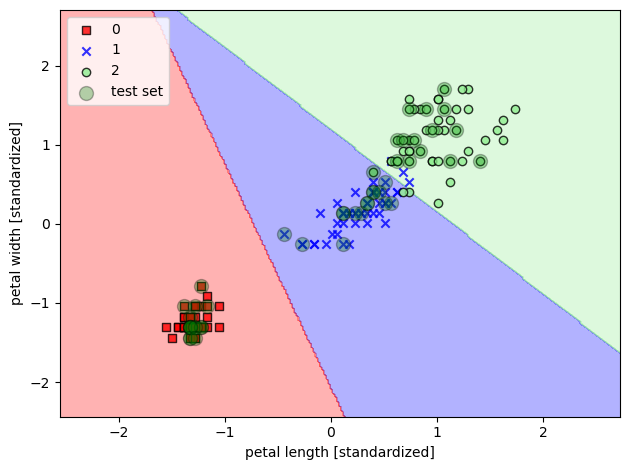

In [15]:
plot_decision_regions(x_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

lr_ = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='multinomial')
# solver = 'newton-cg', 'lbfgs','liblinear', 'sag', and 'saga'
lr_.fit(x_train_std, y_train)

LogisticRegression(C=100.0, multi_class='multinomial', random_state=1)

C:\Users\steph\AppData\Local\Temp\ipykernel_8408\3513498361.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


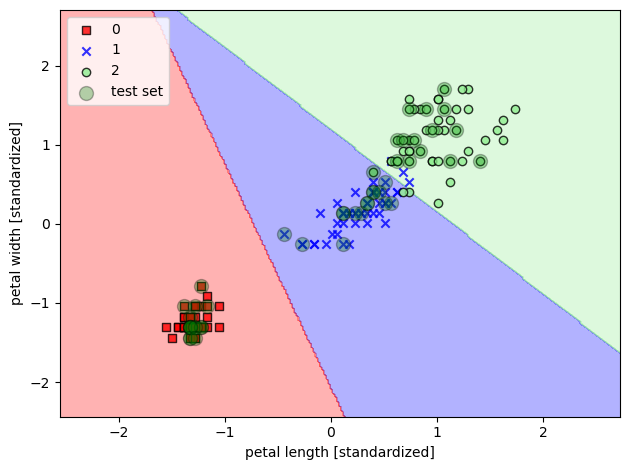

In [17]:
plot_decision_regions(x_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
lr.predict_proba(x_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [19]:
lr.predict_log_proba(x_test_std[:3, :])

array([[-19.38425208,  -1.93245107,  -0.15641158],
       [ -0.18149708,  -1.79589207, -28.75268567],
       [ -0.16389467,  -1.88935967, -31.27195793]])

In [20]:
lr.predict_proba(x_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [21]:
lr.predict_proba(x_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [22]:
lr.predict(x_test_std[:3, :])

array([2, 0, 0])

In [23]:
lr.predict(x_test_std[0, :].reshape(1, -1))

array([2])

In [24]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

In [25]:
weights = np.array(weights)
weights

array([[ 9.45923160e-05,  5.76506032e-05],
       [ 9.42782871e-04,  5.73401558e-04],
       [ 9.12565212e-03,  5.43828417e-03],
       [ 7.06418476e-02,  3.39946744e-02],
       [ 3.09474221e-01, -3.12403273e-02],
       [ 1.15687091e+00, -8.19599881e-01],
       [ 2.15931013e+00, -1.82053519e+00],
       [ 2.40996010e+00, -2.07349026e+00],
       [ 2.43940519e+00, -2.10326245e+00],
       [ 2.44240290e+00, -2.10629411e+00]])

In [26]:
params

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

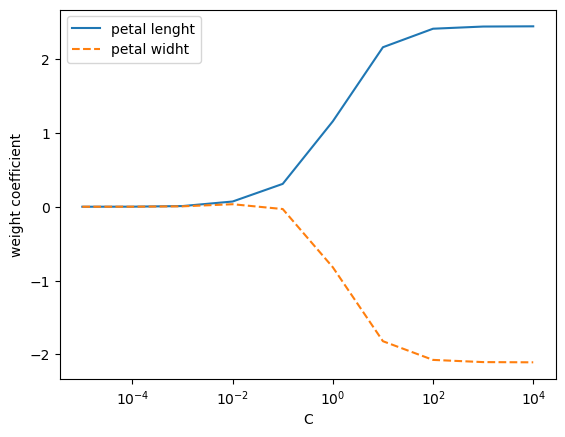

In [27]:
plt.plot(params, weights[:,0], label='petal lenght')
plt.plot(params, weights[:, 1], ls='--', label='petal widht')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## Support Vector Machine

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(x_train_std, y_train)

SVC(kernel='linear', random_state=1)

C:\Users\steph\AppData\Local\Temp\ipykernel_8408\3513498361.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


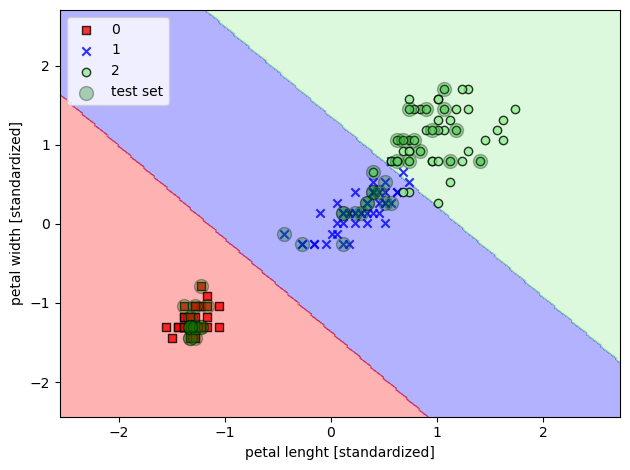

In [29]:
plot_decision_regions(x_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## Kernel methods for linearly inseparable data

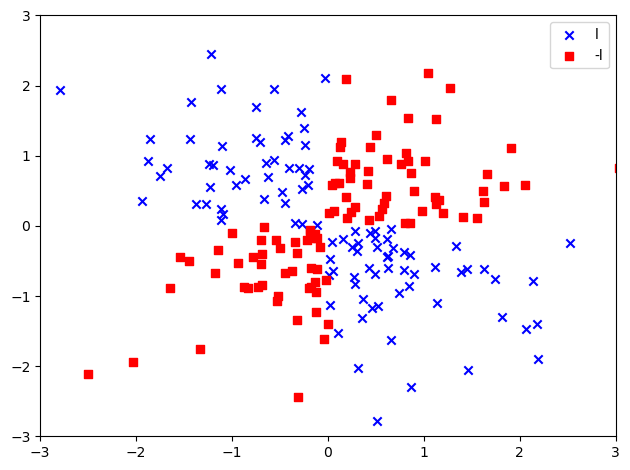

In [31]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0]>0, X_xor[:, 1]>0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='l')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-l')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [32]:
svm =SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

SVC(C=10.0, gamma=0.1, random_state=1)

C:\Users\steph\AppData\Local\Temp\ipykernel_8408\3513498361.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


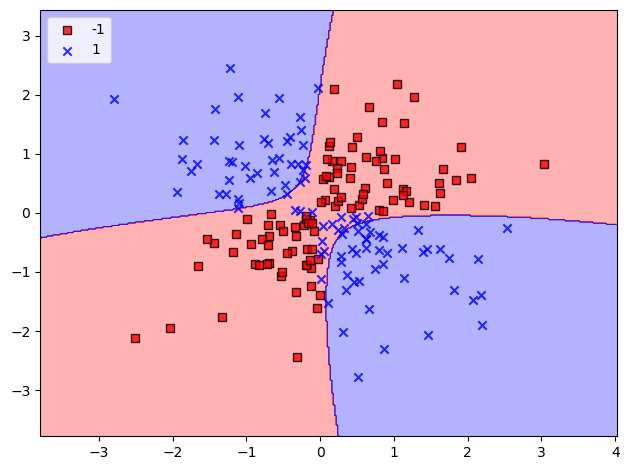

In [33]:
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [34]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(x_train_std, y_train)

SVC(gamma=0.2, random_state=1)

plot_decision_regions(x_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Decision tree learning

In [35]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [36]:
X_combined = np.vstack((x_train, x_test))
Y_combined = np.hstack((y_train, y_test))

C:\Users\steph\AppData\Local\Temp\ipykernel_8408\3513498361.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


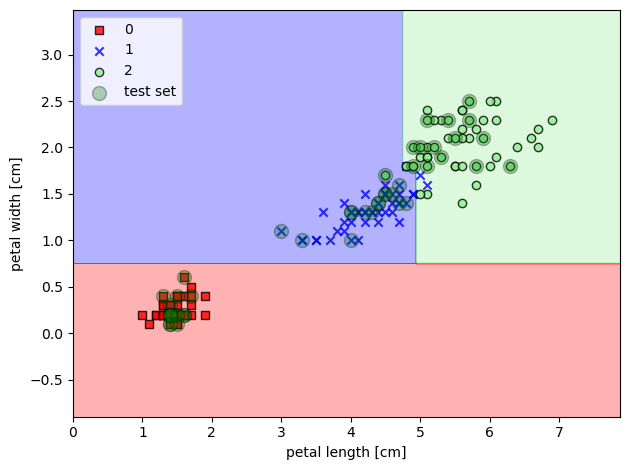

In [37]:
plot_decision_regions(X_combined, Y_combined, classifier=tree_model, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

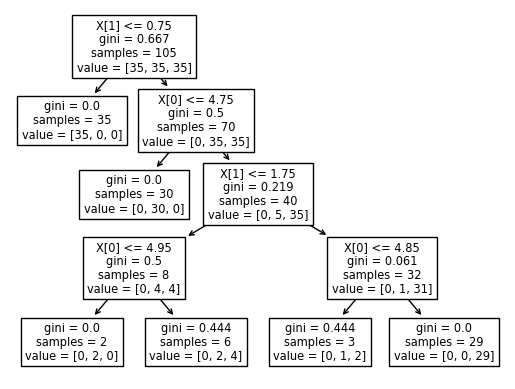

In [38]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

In [40]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_model, filled=True, rounded=True, class_names=['Setosa', 'Versicolor','Virginica'], feature_names=['petal length', 'petal width'], out_file=None)
graph = graph_from_dot_data(dot_data)

In [41]:
graph.write_png('tree.png')

True

# Image "tree.png" is :

<figure>
    <img src='tree.png'  width="400"  >
<figure/>

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

C:\Users\steph\AppData\Local\Temp\ipykernel_8408\3513498361.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


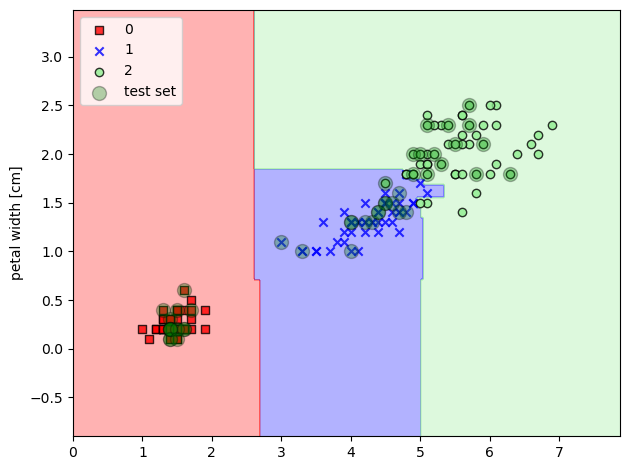

In [43]:
plot_decision_regions(X_combined, Y_combined, classifier=forest, test_idx=range(105,150))
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## K-nearest neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train_std, y_train)

KNeighborsClassifier()

C:\Users\steph\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\steph\AppData\Local\Temp\ipykernel_8408\3513498361.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


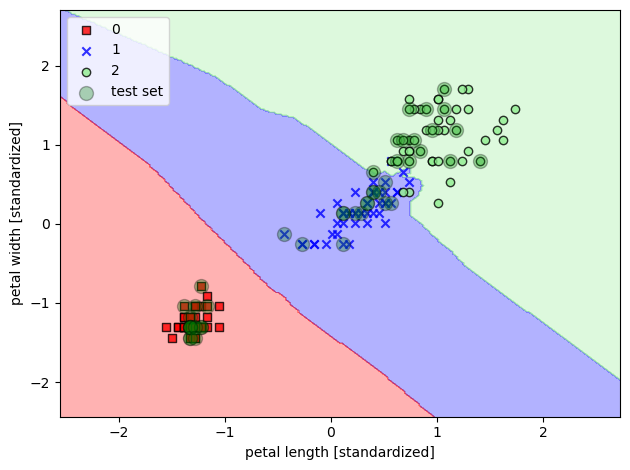

In [46]:
plot_decision_regions(x_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.ylabel('petal width [standardized]')
plt.xlabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()